<a href="https://colab.research.google.com/github/Hxnss/nyoba/blob/main/sentimen_analysis_hok_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Scrapping Data

In [9]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00


In [11]:
from google_play_scraper import app, Sort, reviews
import pandas as pd
import numpy as np

result, continuation_token = reviews(
    'com.levelinfinite.sgameGlobal',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=2000,
    filter_score_with = None
)

In [12]:
df_data = pd.DataFrame(np.array(result), columns=['review'])
df_data = df_data.join(pd.DataFrame(df_data.pop('review').tolist()))

In [13]:
df_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,25f49dd0-367c-4ccc-8cb0-8c9de86d2bf3,Rafly Raf,https://play-lh.googleusercontent.com/a-/ALV-U...,"Untuk sejauh ini game nya Bagusss!!!, tapi tol...",4,15,10.2.1.3,2025-01-20 01:45:22,None,NaT,10.2.1.3
1,a4f1f011-43c0-4442-8de7-5c4a32261a3e,Ahmad Sahrul,https://play-lh.googleusercontent.com/a-/ALV-U...,Halo saya sangat menikmati gamenya grafisnya b...,4,2,10.2.1.3,2025-01-20 09:50:27,None,NaT,10.2.1.3
2,7dfa4dd2-6730-42d3-a051-3298ee9d8f29,Satrio Pratama,https://play-lh.googleusercontent.com/a/ACg8oc...,Masih banyak kekurangan contohnya : 1.darah ba...,5,125,10.2.1.3,2025-01-19 00:26:43,None,NaT,10.2.1.3
3,46c1113a-ea00-4225-9b10-e41a3afcd63e,Farhan Syah,https://play-lh.googleusercontent.com/a/ACg8oc...,"matchmaking kadang ga selevel/sebanding, build...",1,105,10.2.1.3,2025-01-19 21:59:58,"Hai pemain, \nPemain dari negara yang berbeda ...",2025-01-20 04:25:11,10.2.1.3
4,fff366d3-9ceb-4bbb-a985-b837bbbb7354,Galvin Saputra,https://play-lh.googleusercontent.com/a-/ALV-U...,"Dari event dll nya udah bagus,sangat pantas me...",5,373,10.2.1.2,2025-01-15 06:14:56,None,NaT,10.2.1.2


In [14]:
my_df = df_data
my_df.to_csv("scrapping_hok.csv", index=False)

## 2. Input Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [33]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [15]:
df = pd.read_csv('scrapping_hok.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,25f49dd0-367c-4ccc-8cb0-8c9de86d2bf3,Rafly Raf,https://play-lh.googleusercontent.com/a-/ALV-U...,"Untuk sejauh ini game nya Bagusss!!!, tapi tol...",4,15,10.2.1.3,2025-01-20 01:45:22,NaN,NaN,10.2.1.3
1,a4f1f011-43c0-4442-8de7-5c4a32261a3e,Ahmad Sahrul,https://play-lh.googleusercontent.com/a-/ALV-U...,Halo saya sangat menikmati gamenya grafisnya b...,4,2,10.2.1.3,2025-01-20 09:50:27,NaN,NaN,10.2.1.3
2,7dfa4dd2-6730-42d3-a051-3298ee9d8f29,Satrio Pratama,https://play-lh.googleusercontent.com/a/ACg8oc...,Masih banyak kekurangan contohnya : 1.darah ba...,5,125,10.2.1.3,2025-01-19 00:26:43,NaN,NaN,10.2.1.3
3,46c1113a-ea00-4225-9b10-e41a3afcd63e,Farhan Syah,https://play-lh.googleusercontent.com/a/ACg8oc...,"matchmaking kadang ga selevel/sebanding, build...",1,105,10.2.1.3,2025-01-19 21:59:58,"Hai pemain, \nPemain dari negara yang berbeda ...",2025-01-20 04:25:11,10.2.1.3
4,fff366d3-9ceb-4bbb-a985-b837bbbb7354,Galvin Saputra,https://play-lh.googleusercontent.com/a-/ALV-U...,"Dari event dll nya udah bagus,sangat pantas me...",5,373,10.2.1.2,2025-01-15 06:14:56,NaN,NaN,10.2.1.2
...,...,...,...,...,...,...,...,...,...,...,...
1995,dbf8e8e6-d7b8-438f-b234-cf44291fff28,Selamet amrin,https://play-lh.googleusercontent.com/a/ACg8oc...,tolong lah di perbaiki buat hero sesuai karakt...,1,7,10.1.1.9,2024-11-03 01:47:46,"Halo pemain,\nTerkait masalah yang Anda jelask...",2024-11-03 04:49:24,10.1.1.9
1996,655fc009-53b0-40f1-88fe-546366619ab7,Idnas r,https://play-lh.googleusercontent.com/a/ACg8oc...,tolong ping dibikin lebih stabil pdahal game l...,5,0,10.1.1.15,2024-12-14 05:39:19,NaN,NaN,10.1.1.15
1997,6b6425a4-02a5-404a-b216-4f8d04fb5969,Ridho armando Putra,https://play-lh.googleusercontent.com/a/ACg8oc...,Tolong kasih tim yg bener masa lawanya pada ja...,3,0,10.1.1.9,2024-11-08 06:28:01,NaN,NaN,10.1.1.9
1998,3b408275-d7f1-45ea-9fd0-1e213e69bed3,Gunawansyahrul Syahrul,https://play-lh.googleusercontent.com/a-/ALV-U...,Sering keluar sendiri saat login game masuk ke...,2,0,9.4.1.12,2024-08-11 19:05:08,"Hai pemain, \nHal ini mungkin disebabkan oleh ...",2024-08-14 02:22:57,9.4.1.12


In [16]:
df = df[['content', 'score']]
df

,content,score
0,"Untuk sejauh ini game nya Bagusss!!!, tapi tol...",4
1,Halo saya sangat menikmati gamenya grafisnya b...,4
2,Masih banyak kekurangan contohnya : 1.darah ba...,5
3,"matchmaking kadang ga selevel/sebanding, build...",1
4,"Dari event dll nya udah bagus,sangat pantas me...",5
...,...,...
1995,tolong lah di perbaiki buat hero sesuai karakt...,1
1996,tolong ping dibikin lebih stabil pdahal game l...,5
1997,Tolong kasih tim yg bener masa lawanya pada ja...,3
1998,Sering keluar sendiri saat login game masuk ke...,2


In [17]:
df.shape

(2000, 2)

In [19]:
 df = df.drop_duplicates(subset='content')

In [20]:
df = df.dropna()

In [22]:
df.shape

(2000, 2)

In [23]:
def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['content'] = df['content'].apply(clean_text)

In [26]:
df['content'] = df['content'].str.lower()

In [27]:
df.head()

,content,score
0,untuk sejauh ini game nya bagusss tapi tolong ...,4
1,halo saya sangat menikmati gamenya grafisnya b...,4
2,masih banyak kekurangan contohnya 1darah base ...,5
3,matchmaking kadang ga selevelsebanding build i...,1
4,dari event dll nya udah bagussangat pantas men...,5


## 3. Preprocessing

In [28]:
score = df['score']

In [29]:
def filter_token_length(dataframe, column, min_words, max_words):
  words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
  mask = (words_count >= min_words) & (words_count <= max_words)
  filtered_df = dataframe[mask]
  return filtered_df

min_words = 3
max_words = 50
df = filter_token_length(df, 'content', min_words, max_words)

In [32]:
# Normalisasi
norm = {' bgt ': ' banget ', ' gmna ': ' gimana ', ' gmn ': ' gimana ', ' ga ': ' tidak ', ' gak ': ' tidak ', ' ngga ': ' tidak ', ' ngk ': ' tidak ', ' nggak ': ' tidak ', ' tp ': ' tapi ', ' bkn ': ' bukan ', ' krn ': ' karena ', ' knp ': ' kenapa ', ' gk ': ' tidak ', ' km ': ' kamu ', ' sm ': ' sama ', ' sdh ': ' sudah ', ' udh ': ' sudah ', ' aja ': ' saja ', ' jg ': ' juga ', ' dr ': ' dari ', ' jd ': ' jadi ', ' br ': ' baru ', ' sy ': ' saya ', ' sya ': ' saya ', ' gw ': ' saya ', ' gua ': ' saya ', ' ane ': ' saya ', ' trs ': ' terus ', ' plz ': ' tolong ', ' pliss ': ' tolong ', ' apk ': ' aplikasi ',
    ' lbh ': ' lebih ', ' hrs ': ' harus ', ' smoga ': ' semoga ', ' bsa ': ' bisa ', ' bs ': ' bisa ', ' tlong ': ' tolong ', ' tlg ': ' tolong ', ' klo ': ' kalau ', ' klau ': ' kalau ', ' dlm ': ' dalam ', ' dmn ': ' dimana ', ' dmna ': ' dimana ', ' y ': ' iya ', ' ya ': ' iya ', ' brng ': ' barang ', ' bgmn ': ' bagaimana ', ' gimn ': ' gimana ', ' byr ': ' bayar ', ' prnh ': ' pernah ', ' sna ': ' sana ', ' tsb ': ' tersebut ', ' sbg ': ' sebagai ', ' yg ': ' yang ', ' utk ': ' untuk ', ' trnyata ': ' ternyata ', ' ok ': ' oke ', ' okk ': ' oke ', ' mantul ': ' mantap betul ', ' mantapp ': ' mantap ', ' moga ': ' semoga ', ' ampir ': ' hampir ', ' nya ': ' nya ', ' wkt ': ' waktu ', ' skrg ': ' sekarang ', ' cpt ': ' cepat ', ' dpt ': ' dapat ', ' trima ': ' terima ', ' lag ': ' tertunda ', ' tolng ': ' tolong ', ' lumayan ': ' lumayan ', ' lemot ': ' lambat ', ' error ': ' kesalahan ', ' baguss ': ' bagus ', ' jelek ': ' buruk ', ' lmyan ': ' lumayan ',
}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [38]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stopword = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stopword)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text =  stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))

In [39]:
tokenized = df['content'].apply(lambda x:x.split())
tokenized

,content
0,"[sejauh, game, nya, bagusss, perbaiki, pas, ba..."
1,"[halo, sangat, menikmati, gamenya, grafisnya, ..."
3,"[matchmaking, kadang, selevelsebanding, build,..."
4,"[event, nya, udah, bagussangat, pantas, mendap..."
5,"[kali, sehabis, update, data, penyimpanan, sem..."
...,...
1994,"[habis, update, mau, login, susah, perbaiki, d..."
1995,"[lah, perbaiki, buat, hero, sesuai, karakter, ..."
1996,"[ping, dibikin, lebih, stabil, pdahal, game, l..."
1997,"[kasih, tim, bener, masa, lawanya, jago, tim, ..."


In [40]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(lambda x: stemming(x))

jauh game nya bagusss baik pas bagi foto avatar nya donk pas guna gambar sendiri ngeblur gambar nya jadi lebih hd in donk kualitas nya si sabar nunggu collab detective conan
halo sangat nikmat gamenya grafis bagus hero nya keren banyak event tarik suatu bug apa rumput rumput nya kok hilang iya gimana ngatasin nya bantu jadi nya seru kalo gada rumput nya
matchmaking kadang selevelsebanding build item bilang banyak tpi sulit bedain item kurang imbang sulit leveling awal game farm gold meski objektif harga item cukup mahal darksystem makin parah hingga kurang balance terkadang frame main terkadang serasa tim bot komunikasi sulit
event nya udah bagussangat pantas dapat bintang 5 sistem matching nya beri adil player solo sering ketemu tim main dar nyoba hero rank malah ketemu musuh jago terkadang buat mood main jadi hilang
kali habis update data simpan makin besar tembus 11 gb lebih padahal game bilang baru sini beda game belah 10tahun lebih simpan bawah 8gb main jadi makin berat tambah tea

In [41]:
tokenized

,content
0,jauh game nya bagusss baik pas bagi foto avata...
1,halo sangat nikmat gamenya grafis bagus hero n...
3,matchmaking kadang selevelsebanding build item...
4,event nya udah bagussangat pantas dapat bintan...
5,kali habis update data simpan makin besar temb...
...,...
1994,habis update mau login susah baik dong sinyal ...
1995,lah baik buat hero sesuai karakter lane hapus ...
1996,ping bikin lebih stabil pdahal game lancar red...
1997,kasih tim bener masa lawa jago tim sendiri bot...


In [42]:
score

,score
0,4
1,4
2,5
3,1
4,5
...,...
1995,1
1996,5
1997,3
1998,2


In [43]:
score.drop(columns=["Unnamed: 0"], inplace=True)
df = pd.concat([tokenized, score], axis=1)
df

,content,score
0,jauh game nya bagusss baik pas bagi foto avata...,4
1,halo sangat nikmat gamenya grafis bagus hero n...,4
3,matchmaking kadang selevelsebanding build item...,1
4,event nya udah bagussangat pantas dapat bintan...,5
5,kali habis update data simpan makin besar temb...,1
...,...,...
1976,NaN,3
1983,NaN,1
1991,NaN,3
1993,NaN,2


In [66]:
df = df.dropna()
df.shape

(1347, 3)

## 4. Labeling

In [67]:
def label_sentiment(score):
  if score <= 2:
    return 'Negatif'
  else:
    return 'Positif'

df['sentiment'] = df['score'].apply(label_sentiment)

In [68]:
df.head(5)

,content,score,sentiment
0,jauh game nya bagusss baik pas bagi foto avata...,4,Positif
1,halo sangat nikmat gamenya grafis bagus hero n...,4,Positif
3,matchmaking kadang selevelsebanding build item...,1,Negatif
4,event nya udah bagussangat pantas dapat bintan...,5,Positif
5,kali habis update data simpan makin besar temb...,1,Negatif


In [69]:
sentiment_counts = df.sentiment.value_counts()
sentiment_counts

,count
sentiment,
Negatif,705
Positif,642


## 5. Visualisasi

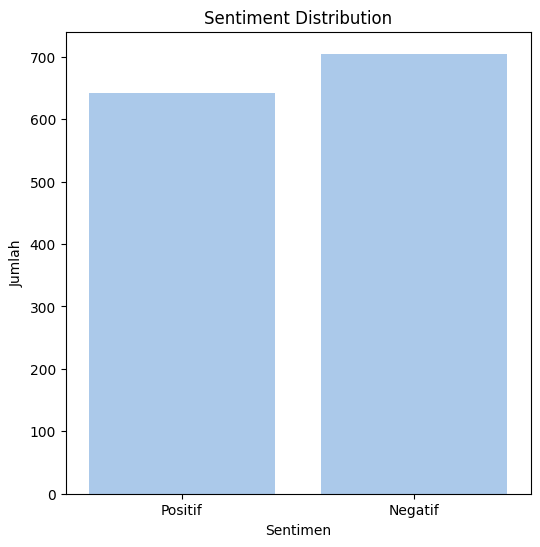

In [70]:
# Visualisasi
sns.set_palette('pastel')
plt.figure(figsize=(6, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [71]:
data_negatif = df[df['sentiment'] == 'Negatif']
data_positif = df[df['sentiment'] == 'Positif']

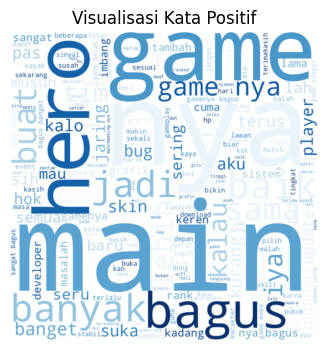

In [75]:
# Sentiment Positif
all_text_s1 = ' '.join(str(word) for word in data_positif['content'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualisasi Kata Positif')
plt.margins(x=0, y=0)
plt.show()

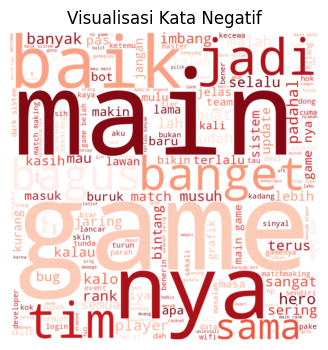

In [74]:
# Sentimen Negatif

all_text_s2 = ' '.join(str(word) for word in data_negatif['content'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s2)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualisasi Kata Negatif')
plt.margins(x=0, y=0)
plt.show()

## 6. Splitting Data

In [79]:
X = df.content
y = df.sentiment

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Training Data (SVM, Naive Bayes, RandomForest)

In [81]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

cvec = CountVectorizer()
tvec = TfidfVectorizer()
hvec = HashingVectorizer()

In [83]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf1 = SVC(kernel='linear')
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

In [84]:
from sklearn.pipeline import Pipeline

model1 = Pipeline([('vectorizer', tvec),
                   ('classifier', clf1)])
model2 = Pipeline([('vectorizer', tvec),
                   ('classifier', clf2)])
model3 = Pipeline([('vectorizer', tvec),
                   ('classifier', clf3)])

In [87]:
model1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [88]:
hasil = model1.predict(X_test)

In [91]:
matrix = classification_report(y_test, hasil)
print('Hasil Klasifikasi SVM : \n', matrix)

Hasil Klasifikasi SVM : 
               precision    recall  f1-score   support

     Negatif       0.76      0.70      0.73       150
     Positif       0.66      0.72      0.69       120

    accuracy                           0.71       270
   macro avg       0.71      0.71      0.71       270
weighted avg       0.71      0.71      0.71       270



In [92]:
model2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [93]:
hasil2 = model2.predict(X_test)

In [94]:
matrix = classification_report(y_test, hasil2)
print('Hasil Klasifikasi Naive Bayes : \n', matrix)

Hasil Klasifikasi Naive Bayes : 
               precision    recall  f1-score   support

     Negatif       0.76      0.79      0.78       150
     Positif       0.73      0.68      0.70       120

    accuracy                           0.74       270
   macro avg       0.74      0.74      0.74       270
weighted avg       0.74      0.74      0.74       270



In [95]:
model3.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [96]:
hasil3 = model3.predict(X_test)

In [97]:
matrix = classification_report(y_test, hasil3)
print('Hasil Klasifikasi Random Forest : \n', matrix)

Hasil Klasifikasi Random Forest : 
               precision    recall  f1-score   support

     Negatif       0.78      0.73      0.75       150
     Positif       0.68      0.74      0.71       120

    accuracy                           0.73       270
   macro avg       0.73      0.73      0.73       270
weighted avg       0.74      0.73      0.73       270



In [103]:
hasil_SVM = accuracy_score(hasil, y_test)
precision1 = precision_score(hasil, y_test, average='weighted')
recall1 = recall_score(hasil, y_test, average='weighted')
f1_score1 = f1_score(hasil, y_test, average='weighted')

hasil_NB = accuracy_score(hasil2, y_test)
precision2 = precision_score(hasil2, y_test, average='weighted')
recall2 = recall_score(hasil2, y_test, average='weighted')
f1_score2 = f1_score(hasil2, y_test, average='weighted')

hasil_RF = accuracy_score(hasil3, y_test)
precision3 = precision_score(hasil3, y_test, average='weighted')
recall3 = recall_score(hasil3, y_test, average='weighted')
f1_score3 = f1_score(hasil3, y_test, average='weighted')

In [104]:
model = {'Model' :['Decision Tree Classifier',
                   'Naive Bayes Classifier',
                   'Random Forest Classifier',
                   ],
         'AccuracyScore': [hasil_SVM, hasil_NB, hasil_RF],
         'Precision' : [precision1, precision2, precision3],
         'Recall' : [recall1, recall2, recall3],
         'F1-Score' : [f1_score1, f1_score2, f1_score3]
         }

df_model = pd.DataFrame(model)
df_model

,Model,AccuracyScore,Precision,Recall,F1-Score
0,Decision Tree Classifier,0.707407,0.708086,0.707407,0.706564
1,Naive Bayes Classifier,0.744444,0.747296,0.744444,0.745370
2,Random Forest Classifier,0.733333,0.733889,0.733333,0.732598


## 8. Testing Data

In [106]:
def classify_text(input_text):
  models = [
      ('DecisionTreeClassifier', model_decisionTree),
      ('NaiveBayesClassifier', model_naiveBayes),
      ('RandomForestClassifier', model_randomForest)
  ]

  result = {}

  for name, model in models:
    prediction = model.predict([input_text])
    result[name] = prediction[0]

  return result

In [108]:
model_decisionTree = model1.fit(X_train, y_train)
model_naiveBayes = model2.fit(X_train, y_train)
model_randomForest = model3.fit(X_train, y_train)

In [115]:
input_text = input("Masukkan teks yang ingin di Klasifikasikan: ")

result = classify_text(input_text)

print("Input Kata :", input_text)

print("\nHasil Klasifikasi:")
for model, prediction in result.items():
    print(f"{model}: {prediction}")

Masukkan teks yang ingin di Klasifikasikan: aplikasi bagus, mending hapus aja
Input Kata : aplikasi bagus, mending hapus aja

Hasil Klasifikasi:
DecisionTreeClassifier: Negatif
NaiveBayesClassifier: Negatif
RandomForestClassifier: Positif
